Shape: (151112, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

First 5 rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Missing values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
After cleaning - Shape: (151112, 11)


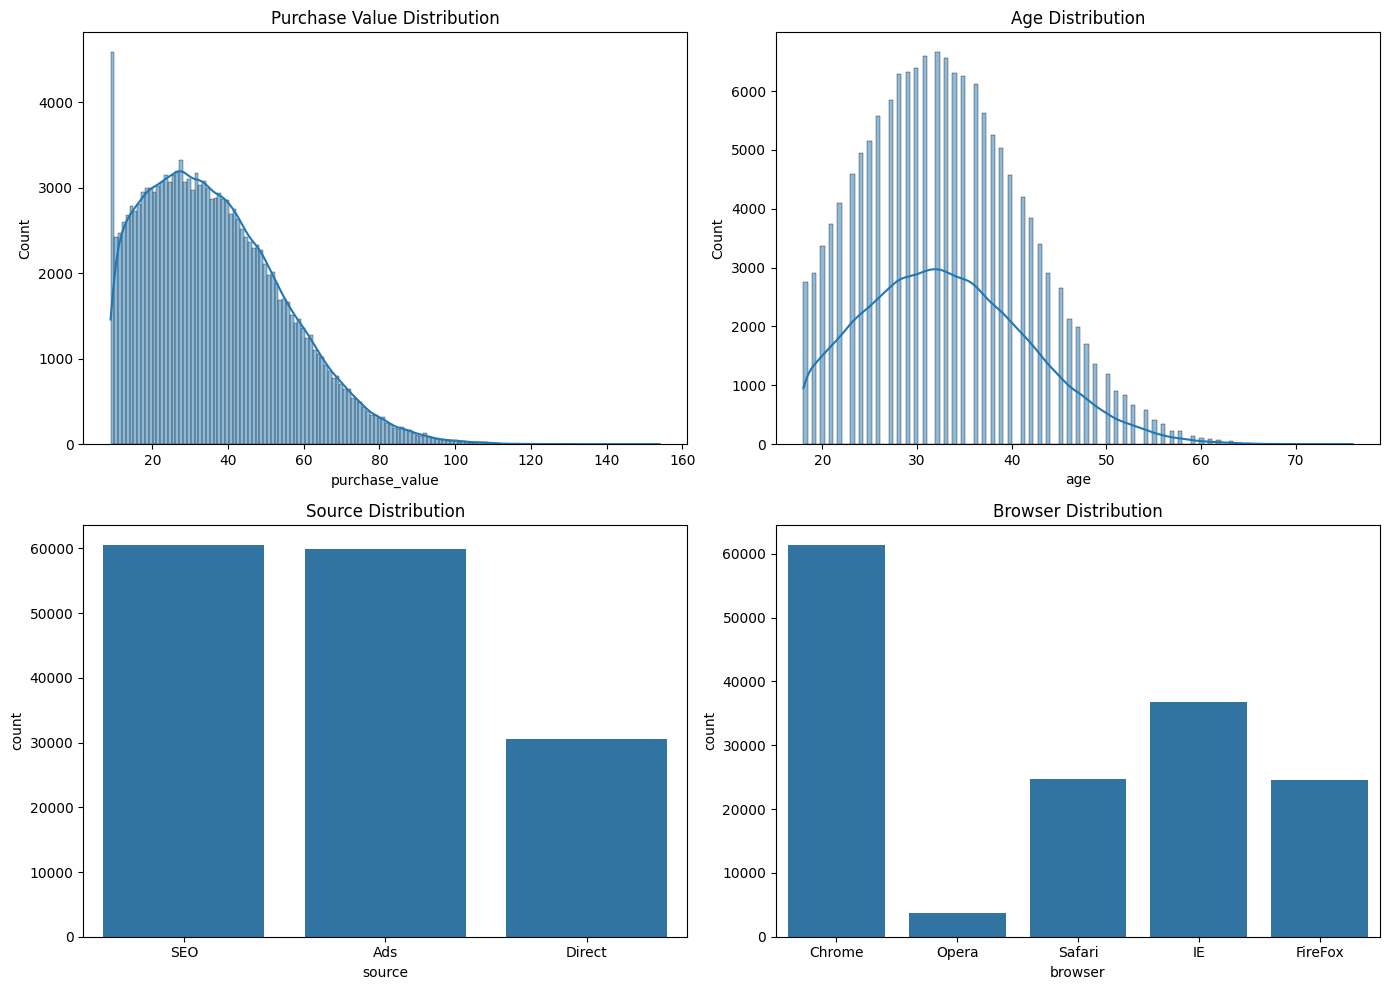

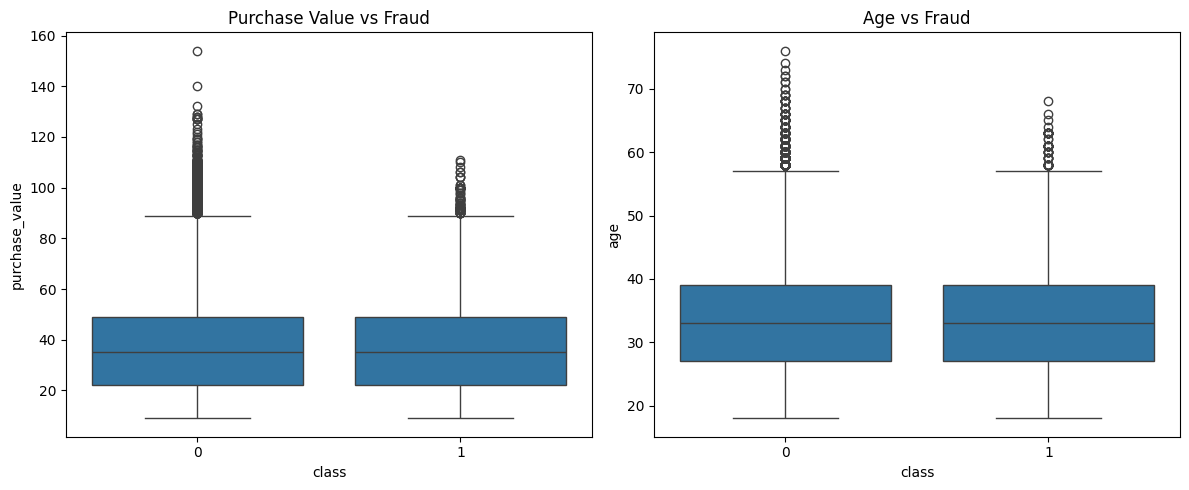

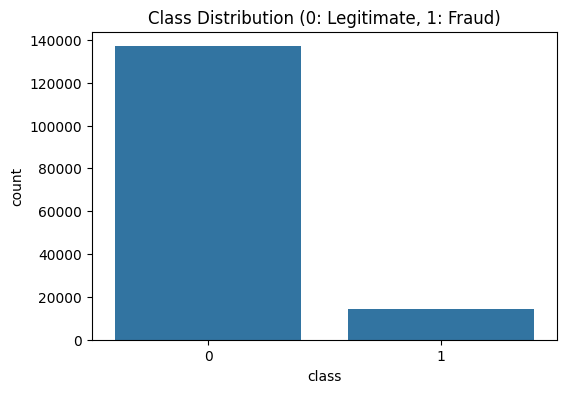

Fraud rate: 9.36%


In [2]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Load raw data
df_fraud = pd.read_csv('../data/raw/Fraud_Data.csv')

# Cell 3: Initial overview
print("Shape:", df_fraud.shape)
print("\nInfo:")
df_fraud.info()
print("\nFirst 5 rows:")
display(df_fraud.head())

# Cell 4: Missing values
print("Missing values:")
print(df_fraud.isnull().sum())

# Cell 5: Data Cleaning
# Handle missing values (impute with median/mode)
df_fraud['purchase_value'].fillna(df_fraud['purchase_value'].median(), inplace=True)
df_fraud['age'].fillna(df_fraud['age'].median(), inplace=True)
df_fraud['source'].fillna(df_fraud['source'].mode()[0], inplace=True)
df_fraud['browser'].fillna(df_fraud['browser'].mode()[0], inplace=True)
df_fraud['sex'].fillna(df_fraud['sex'].mode()[0], inplace=True)

# Remove duplicates
df_fraud.drop_duplicates(inplace=True)

# Convert timestamps and ip_address
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud['ip_address'] = df_fraud['ip_address'].astype('int64')

print("After cleaning - Shape:", df_fraud.shape)

# Cell 6: Save cleaned version
df_fraud.to_csv('../data/processed/cleaned_fraud_data.csv', index=False)

# Cell 7: Univariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df_fraud['purchase_value'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Purchase Value Distribution')
sns.histplot(df_fraud['age'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')
sns.countplot(x='source', data=df_fraud, ax=axes[1,0])
axes[1,0].set_title('Source Distribution')
sns.countplot(x='browser', data=df_fraud, ax=axes[1,1])
axes[1,1].set_title('Browser Distribution')
plt.tight_layout()
plt.show()

# Cell 8: Bivariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='class', y='purchase_value', data=df_fraud, ax=axes[0])
axes[0].set_title('Purchase Value vs Fraud')
sns.boxplot(x='class', y='age', data=df_fraud, ax=axes[1])
axes[1].set_title('Age vs Fraud')
plt.tight_layout()
plt.show()

# Cell 9: Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df_fraud)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

fraud_rate = df_fraud['class'].mean() * 100
print(f"Fraud rate: {fraud_rate:.2f}%")